In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import imageio
import matplotlib.pyplot as plt
from mplsoccer import Pitch

Read data either in parquet or CSV format

In [2]:
position_df = pd.read_parquet('sample_tracking_data.parquet')
# position_df = pd.read_csv('sample_tracking_data.csv', index_col=0)

In [3]:
position_df.shape

(1365026, 17)

In [4]:
position_df.head(3)

,N,T,X,Y,Z,D,A,S,M,GameSection,TeamId,PersonId,BallPossession,BallStatus,IS_LTR,X_LTR,Y_LTR
0,34855,2014-01-15 10:07:40+01:00,5.49,-5.57,0.0,12.86,-1.90,12.02,17,_Half,DFL-CLU-ZZZZ01,DFL-OBJ-ZZZZ06,2,1,True,5.49,-5.57
1,34855,2014-01-15 10:07:40+01:00,5.33,-24.32,0.0,3.31,-0.61,2.81,17,_Half,DFL-CLU-ZZZZ00,DFL-OBJ-ZZZZ09,2,1,False,-5.33,24.32
2,34855,2014-01-15 10:07:40+01:00,-4.61,-7.26,0.0,4.97,-0.44,5.00,17,_Half,DFL-CLU-ZZZZ00,DFL-OBJ-ZZZZ08,2,1,False,4.61,7.26


Positional data is collected at 25 frames per second. Each row of the DataFrame represents the gathered data of one "agent", i.e. player, referee, or ball, at one frame.


* N: FrameID. Numeric ID of the current frame
* T: Real time of that frame
* X: X-position of the agent at frame N. This represents the dimension between the two goals in meters, where the "left" goal is at X=-52.5 and the "right" goal at 52.5.
* Y: Y-position of the agent at frame N. This represents the dimension between the two sidelines in meters, with range -34 to 34.
* Z: Z-Position of the ball at frame N. This is always 0 except for the ball where it represents the height of the ball in meters.
* A: Acceleration of agent.
* S: Speed of agent.
* M: Minute of play
* GameSection: Generally represents the half of the game (firstHalf, secondHalf)
* TeamId: ID of the team. Can be one of 'referree', 'BALL', and the two teams
* PersonId: ID of the agent
* BallPossession. Determines which team has ball possession. One of {1,2}.
* BallStatus: Determines whether the ball is in play or if the game has stopped, e.g. due to a foul. One of {0,1}
* IS_LTR: Determines whether the row's player and team is playing 'from left to right'
* X_LTR: The X-Position of the player IF he would play from left to right. I.e. if he isn't, the X-position is reversed.
* Y_LTR: The Y-Position of the player IF he would play from left to right. I.e. if he isn't, the Y-position is reversed.


Overall, this sample data consists of 35 minutes of play. Player and team IDs, frames, times, minutes, and GameSections are anonymized. 

In [5]:
position_df.query('TeamId == "BALL"')

,N,T,X,Y,Z,D,A,S,M,GameSection,TeamId,PersonId,BallPossession,BallStatus,IS_LTR,X_LTR,Y_LTR
19,34855,2014-01-15 10:07:40+01:00,5.59,-7.77,0.21,43.02,0.0,29.22,17,_Half,BALL,DFL-OBJ-ZZZZ13,2,1,False,-5.59,7.77
39,34856,2014-01-15 10:07:40.040000+01:00,5.98,-7.58,0.28,43.41,0.0,9.96,17,_Half,BALL,DFL-OBJ-ZZZZ13,2,1,False,-5.98,7.58
71,34857,2014-01-15 10:07:40.080000+01:00,6.36,-7.37,0.35,42.82,0.0,24.01,17,_Half,BALL,DFL-OBJ-ZZZZ13,2,1,False,-6.36,7.37
94,34858,2014-01-15 10:07:40.120000+01:00,6.75,-7.15,0.42,45.09,0.0,39.49,17,_Half,BALL,DFL-OBJ-ZZZZ13,2,1,False,-6.75,7.15
123,34859,2014-01-15 10:07:40.160000+01:00,7.10,-6.94,0.44,40.88,0.0,40.14,17,_Half,BALL,DFL-OBJ-ZZZZ13,2,1,False,-7.10,6.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364909,87351,2014-01-15 10:42:39.840000+01:00,8.36,34.06,0.00,0.00,0.0,29.28,52,_Half,BALL,DFL-OBJ-ZZZZ13,2,0,False,-8.36,-34.06
1364935,87352,2014-01-15 10:42:39.880000+01:00,8.36,34.06,0.00,0.00,0.0,29.28,52,_Half,BALL,DFL-OBJ-ZZZZ13,2,0,False,-8.36,-34.06
1364967,87353,2014-01-15 10:42:39.920000+01:00,8.36,34.06,0.00,0.00,0.0,29.28,52,_Half,BALL,DFL-OBJ-ZZZZ13,2,0,False,-8.36,-34.06
1364990,87354,2014-01-15 10:42:39.960000+01:00,8.36,34.06,0.00,0.00,0.0,29.28,52,_Half,BALL,DFL-OBJ-ZZZZ13,2,0,False,-8.36,-34.06


Get the teams and their players (including referees and ball)

In [6]:
position_df.TeamId.unique()

array(['DFL-CLU-ZZZZ01', 'DFL-CLU-ZZZZ00', 'referee', 'BALL'],
      dtype=object)

In [7]:
team_to_player_dict = position_df.groupby("TeamId")['PersonId'].unique().to_dict()
team_to_player_dict

{'BALL': array(['DFL-OBJ-ZZZZ13'], dtype=object),
 'DFL-CLU-ZZZZ00': array(['DFL-OBJ-ZZZZ09', 'DFL-OBJ-ZZZZ08', 'DFL-OBJ-ZZZZ07',
        'DFL-OBJ-ZZZZ10', 'DFL-OBJ-ZZZZ02', 'DFL-OBJ-ZZZZ01',
        'DFL-OBJ-ZZZZ18', 'DFL-OBJ-ZZZZ15', 'DFL-OBJ-ZZZZ16',
        'DFL-OBJ-ZZZZ22', 'DFL-OBJ-ZZZZ25'], dtype=object),
 'DFL-CLU-ZZZZ01': array(['DFL-OBJ-ZZZZ06', 'DFL-OBJ-ZZZZ05', 'DFL-OBJ-ZZZZ03',
        'DFL-OBJ-ZZZZ11', 'DFL-OBJ-ZZZZ20', 'DFL-OBJ-ZZZZ12',
        'DFL-OBJ-ZZZZ17', 'DFL-OBJ-ZZZZ19', 'DFL-OBJ-ZZZZ21',
        'DFL-OBJ-ZZZZ23', 'DFL-OBJ-ZZZZ14'], dtype=object),
 'referee': array(['DFL-OBJ-ZZZZ00', 'DFL-OBJ-ZZZZ04', 'DFL-OBJ-ZZZZ24'], dtype=object)}

Find out which team ID corresponds to which BallPossession indicator

In [8]:
# compute distances of all agents to the ball (including ball)
position_df = position_df.set_index('N')
ball_df = position_df.query('TeamId == "BALL"')
dist_df = pd.merge(position_df, ball_df[['X','Y']].rename(columns={'X':'Ball_X','Y':'Ball_Y'}), left_index=True, right_index=True)
dist_df['Dist'] = np.linalg.norm(dist_df[['X','Y']] - dist_df[['Ball_X','Ball_Y']].values, axis=1)

In [12]:
# get all players of team DFL-CLU-ZZZZ01 that are closer to the ball than 0.5m 
ball_candidates = dist_df.sort_values('Dist').groupby('N').nth(1)
# check average BallPossession flag
ball_candidates.query('Dist < 0.5').query('TeamId == "DFL-CLU-ZZZZ01"').describe()

,X,Y,Z,D,A,S,M,BallPossession,BallStatus,X_LTR,Y_LTR,Ball_X,Ball_Y,Dist
count,2088.000000,2088.000000,2088.0,2088.000000,2088.000000,2088.00000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.00000,2088.000000
mean,-5.395273,-0.783012,0.0,8.032438,-0.384373,7.31512,32.918103,1.061782,0.874521,-5.395273,-0.783012,-5.347974,-0.82579,0.336289
std,28.814600,19.675650,0.0,5.931759,2.054636,5.16294,9.958154,0.240816,0.331341,28.814600,19.675650,28.851345,19.64645,0.135897
min,-50.620000,-34.420000,0.0,0.000000,-7.990000,0.00000,17.000000,1.000000,0.000000,-50.620000,-34.420000,-50.530000,-34.24000,0.010000
25%,-27.722500,-19.682500,0.0,3.290000,-1.482500,3.12000,24.000000,1.000000,1.000000,-27.722500,-19.682500,-27.572500,-19.82500,0.250000
50%,-6.965000,-1.850000,0.0,7.210000,0.000000,6.80000,30.000000,1.000000,1.000000,-6.965000,-1.850000,-6.985000,-1.92000,0.380132
75%,16.162500,15.730000,0.0,11.740000,0.840000,10.60250,41.000000,1.000000,1.000000,16.162500,15.730000,16.255000,15.41750,0.447214
max,50.740000,36.320000,0.0,32.710000,5.710000,28.11000,52.000000,2.000000,1.000000,50.740000,36.320000,50.540000,35.91000,0.500000


In [13]:
# check average BallPossession flag of other team. It turns out that average BallPossession is roughly 2 here -> DFL-CLU-ZZZZ00 corresponds to BallPossession 2!
ball_candidates.query('Dist < 0.5').query('TeamId == "DFL-CLU-ZZZZ00"').describe()

,X,Y,Z,D,A,S,M,BallPossession,BallStatus,X_LTR,Y_LTR,Ball_X,Ball_Y,Dist
count,2253.000000,2253.000000,2253.0,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000
mean,18.406813,5.437958,0.0,6.882477,-0.431611,6.346951,34.538393,1.896138,0.728806,-18.406813,-5.437958,18.359458,5.446853,0.259724
std,23.312411,22.153031,0.0,6.890326,1.822879,6.120226,9.967352,0.305149,0.444675,23.312411,22.153031,23.312313,22.175632,0.135222
min,-50.170000,-34.150000,0.0,0.000000,-7.990000,0.000000,17.000000,1.000000,0.000000,-53.470000,-34.580000,-50.270000,-33.900000,0.000000
25%,5.150000,-11.500000,0.0,1.150000,-1.060000,1.100000,23.000000,2.000000,0.000000,-37.820000,-32.530000,5.320000,-11.490000,0.150000
50%,25.610000,-1.160000,0.0,4.830000,-0.050000,4.570000,37.000000,2.000000,1.000000,-25.610000,1.160000,25.700000,-1.290000,0.243516
75%,37.820000,32.530000,0.0,11.480000,0.320000,10.080000,43.000000,2.000000,1.000000,-5.150000,11.500000,37.760000,32.740000,0.382099
max,53.470000,34.580000,0.0,34.090000,5.720000,30.580000,52.000000,2.000000,1.000000,50.170000,34.150000,53.100000,34.470000,0.500000


# TASK

Your task will be to determine, using the available tracking data, 
in which areas of the football pitch the ball possessing players are under most pressure from opponents. 
Your results should be visualized appropriately and your solution should be well documented. 
Note that task and solution should be considered to have more of a Proof of Concept (PoC) character. 
I.e. it is not important (and probably impossible) to find the ‘correct’ solution 
but instead you should find a solution that could be presented to the team internally 
in order to show a way and results towards a final solution. 
In order to solve the task, you have to come up with sensible 
but quick and approximate working definitions of ball possession and pressure that are easy to implement 
but also make sense from a football perspective.

## Definitions / Assumptions used
### Ball possession:

    1. A team is said to be in ball posession in the given frame depending on value assigned to BallPossession.
    2. It can also be computed for the entire game by calculating # of frames associated to a team divided by the # of total frames available.

### Pressure areas:

    1. Attacker: A player of the team in ball possesion. Defender: Player from the team not in ball posession.
    2. When there are 3+ defenders with 3+ attackers in < 5m AND 1 defender < 4m, it can be called organised pressing / pressure area.
    3. Assumption: Not considering final 3rd to be the only pressing area.

In [163]:
position_df = pd.read_parquet('sample_tracking_data.parquet')
position_df = position_df.sort_values('T')

In [164]:
# compute distances of all agents to the ball (including ball)
position_df = position_df.set_index('N')
ball_df = position_df.query('TeamId == "BALL"')
dist_df = pd.merge(position_df, ball_df[['X','Y']].rename(columns={'X':'Ball_X','Y':'Ball_Y'}), left_index=True, right_index=True)
dist_df['Dist'] = np.linalg.norm(dist_df[['X','Y']] - dist_df[['Ball_X','Ball_Y']].values, axis=1)

In [165]:
dist_df = dist_df.reset_index()

In [166]:
# Compute possession and pressures in frames when ball is in play
dist_df = dist_df[dist_df.BallStatus == 1]

In [211]:
# We know that DFL-CLU-ZZZZ00 corresponds to BallPossession 2!

# DFL-CLU-ZZZZ01 : Team 1: Orange Team
# DFL-CLU-ZZZZ00 : Team 2: Blue Team

team_1_possession_data = dist_df[dist_df.BallPossession == 1]
team_2_possession_data = dist_df[dist_df.BallPossession == 2]

In [212]:
# Finding Team 1 pressures
# In possession: Team 2
# Pressure: Team 1

temp_df = team_2_possession_data[(team_2_possession_data.TeamId == 'DFL-CLU-ZZZZ00') & (team_2_possession_data.Dist < 5)]
temp_df = temp_df.groupby('N').agg({'PersonId': 'count'}).reset_index().sort_values('PersonId')
frames_with_3_attackers = temp_df[temp_df.PersonId >= 3].rename(columns={'PersonId': 'Team_2_Attackers'})

temp_df = team_2_possession_data[(team_2_possession_data.TeamId == 'DFL-CLU-ZZZZ01') & (team_2_possession_data.Dist < 5)]
temp_df = temp_df.groupby('N').agg({'PersonId': 'count'}).reset_index().sort_values('PersonId')
frames_with_3_defenders = temp_df[temp_df.PersonId >= 3].rename(columns={'PersonId': 'Team_1_Defenders'})

temp_df = team_2_possession_data[(team_2_possession_data.TeamId == 'DFL-CLU-ZZZZ01') & (team_2_possession_data.Dist < 4)]
temp_df = temp_df.groupby('N').agg({'PersonId': 'count'}).reset_index().sort_values('PersonId')
frames_with_closingdown_defenders = temp_df.rename(columns={'PersonId': 'Team_1_ClosingDown_Defender'})

In [213]:
team_1_pressure_frames = frames_with_3_attackers.merge(frames_with_3_defenders, on='N').merge(frames_with_closingdown_defenders, on='N').sort_values('N')

# # of pressing situations
team_1_pressure_frames['frame_seq'] = team_1_pressure_frames['N'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
print(len(team_1_pressure_frames[team_1_pressure_frames.frame_seq > 1]))

11


In [217]:
team_1_pressure_frames.head()

,N,Team_2_Attackers,Team_1_Defenders,Team_1_ClosingDown_Defender,frame_seq
48,36261,4,3,1,NaN
40,52576,3,3,2,16315.0
41,52577,3,3,1,1.0
42,52578,3,3,1,1.0
20,53176,3,3,1,598.0


In [216]:
create_gif(start_frame=63702-30, end_frame=63713+30, gif_file_name='team_1_pressure_sample4')

/var/folders/7v/9m4nyvsx4d1b9m1n9y_plznr0000gn/T/ipykernel_6851/3943884409.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [159]:
# team 1 pressure examples
# 63672, 63743, sample1
# 76151, 76221, sample2
# 77232, 77299, sample3

In [168]:
# Finding Team 2 pressures
# In possession: Team 1
# Pressure: Team 2

temp_df = team_1_possession_data[(team_1_possession_data.TeamId == 'DFL-CLU-ZZZZ01') & (team_1_possession_data.Dist < 5)]
temp_df = temp_df.groupby('N').agg({'PersonId': 'count'}).reset_index().sort_values('PersonId')
frames_with_3_attackers = temp_df[temp_df.PersonId >= 3].rename(columns={'PersonId': 'Team_1_Attackers'})

temp_df = team_1_possession_data[(team_1_possession_data.TeamId == 'DFL-CLU-ZZZZ00') & (team_1_possession_data.Dist < 5)]
temp_df = temp_df.groupby('N').agg({'PersonId': 'count'}).reset_index().sort_values('PersonId')
frames_with_3_defenders = temp_df[temp_df.PersonId >= 3].rename(columns={'PersonId': 'Team_2_Defenders'})

temp_df = team_1_possession_data[(team_1_possession_data.TeamId == 'DFL-CLU-ZZZZ00') & (team_1_possession_data.Dist < 4)]
temp_df = temp_df.groupby('N').agg({'PersonId': 'count'}).reset_index().sort_values('PersonId')
frames_with_closingdown_defenders = temp_df.rename(columns={'PersonId': 'Team_2_ClosingDown_Defender'})

In [169]:
team_2_pressure_frames = frames_with_3_attackers.merge(frames_with_3_defenders, on='N').merge(frames_with_closingdown_defenders, on='N').sort_values('N')

# # of pressing situations
team_2_pressure_frames['frame_seq'] = team_2_pressure_frames['N'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
print(len(team_2_pressure_frames[team_2_pressure_frames.frame_seq > 1]))

15


In [172]:
create_gif(start_frame=36250-30, end_frame=36260+30, gif_file_name='team_2_pressure_sample1')

/var/folders/7v/9m4nyvsx4d1b9m1n9y_plznr0000gn/T/ipykernel_6851/3943884409.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [ ]:
# team 2 pressure examples
# 36220, 36290, sample1
# 43069, 43139, sample2
# 43731, 43822, sample3
# 77242, 77358, sample4
# 78341, 78406, sample5
# 83654, 83720, sample6

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import VerticalPitch, FontManager, Sbopen
import matplotlib.patheffects as path_effects
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)
# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

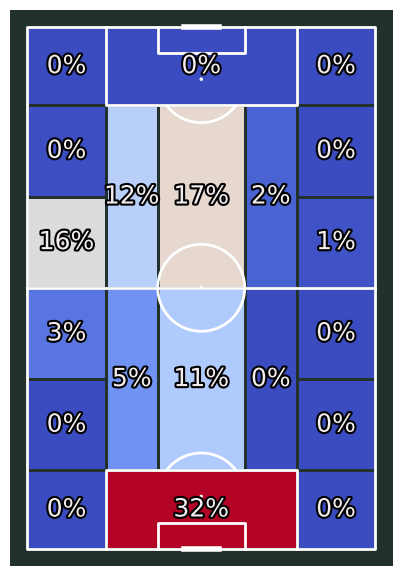

In [253]:
position_df = pd.read_parquet('sample_tracking_data.parquet')
position_df = position_df.sort_values('T')

# DFL-CLU-ZZZZ01 : Team 1: Orange Team
# DFL-CLU-ZZZZ00 : Team 2: Blue Team

position_df_team_1_pressure = position_df[position_df.N.isin(team_1_pressure_frames.N) & (position_df.TeamId == 'DFL-CLU-ZZZZ01')  & (position_df.BallPossession == 2)]
position_df_team_2_pressure = position_df[position_df.N.isin(team_2_pressure_frames.N) & (position_df.TeamId == 'DFL-CLU-ZZZZ00')  & (position_df.BallPossession == 1)]


# setup pitch
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
                      pitch_color='#22312b', line_color='white')
# draw
fig, ax = pitch.draw(figsize=(4.125, 6))
bin_statistic = pitch.bin_statistic_positional(position_df_team_1_pressure.X+pitch_x_offset, 
                                               position_df_team_1_pressure.Y+pitch_y_offset, 
                                               statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

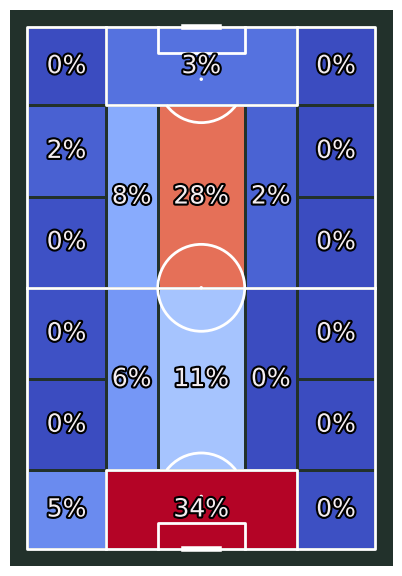

In [255]:
position_df = pd.read_parquet('sample_tracking_data.parquet')
position_df = position_df.sort_values('T')

# DFL-CLU-ZZZZ01 : Team 1: Orange Team
# DFL-CLU-ZZZZ00 : Team 2: Blue Team

position_df_team_1_pressure = position_df[position_df.N.isin(team_1_pressure_frames.N) & (position_df.TeamId == 'DFL-CLU-ZZZZ01')  & (position_df.BallPossession == 2)]
position_df_team_2_pressure = position_df[position_df.N.isin(team_2_pressure_frames.N) & (position_df.TeamId == 'DFL-CLU-ZZZZ00')  & (position_df.BallPossession == 1)]

# setup pitch
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
                      pitch_color='#22312b', line_color='white')
# draw
fig, ax = pitch.draw(figsize=(4.125, 6))
bin_statistic = pitch.bin_statistic_positional(position_df_team_2_pressure.X+pitch_x_offset, 
                                               position_df_team_2_pressure.Y+pitch_y_offset, 
                                               statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

Final thoughts:
    
    1. A lot of duels were fought in Team1's penalty box and in central areas of the pitch.
    2. Team1 likes pressing from the front especially in the left wing / striker zones. And, defensive actions in their own box.
    3. Team2 have heavy pressing actions in their own half and primarily central zones. Also, pressures seen in opposition box.
    4. Team 2 has more examples of pressing scenarios than team 1.
    5. Found a lot more dead ball situations than I had expected. Unclear on that.

    
Metrics that should be investigated / related to pressures:

    High turnovers.
    Shots post successful pressures. (from defending team)
    PPDA. (Passes per Defensive Actions)
    
References used:

    MPLSoccer python package
    Statsbomb
    Soccermatics
    Stats Perform

In [237]:
def create_gif(start_frame, end_frame, gif_file_name):
    filenames = []
    position_df = pd.read_parquet('sample_tracking_data.parquet')
    position_df = position_df.sort_values('T')

    for frame in range(start_frame, end_frame):
        scene = position_df[position_df.N == frame]
        pitch = Pitch(axis=True, label=True, tick=True, positional=True)

        # specifying figure size (width, height)
        pitch_x_offset = 52.5
        pitch_y_offset = 34
        fig, ax = pitch.draw(figsize=(10, 5))

        pitch.scatter(scene[(scene.TeamId == 'DFL-CLU-ZZZZ01')].X+pitch_x_offset, scene[(scene.TeamId == 'DFL-CLU-ZZZZ01')].Y+pitch_y_offset, c='orange', s=80, ec='k', ax=ax)
        pitch.scatter(scene[(scene.TeamId == 'DFL-CLU-ZZZZ00')].X+pitch_x_offset, scene[(scene.TeamId == 'DFL-CLU-ZZZZ00')].Y+pitch_y_offset, c='dodgerblue', s=80, ec='k', ax=ax)
        pitch.scatter(scene[(scene.TeamId == 'BALL')].X+pitch_x_offset, scene[(scene.TeamId == 'BALL')].Y+pitch_y_offset, c='red', s=40, ec='k', ax=ax)

        filename = f'/Users/abhinavralhan/Desktop/Jupyter/personal/sportec/frames/{str(frame)}.png'
        filenames.append(filename)

        # save frame
        plt.savefig(filename)
        plt.close()

    # build gif
    with imageio.get_writer(f'/Users/abhinavralhan/Desktop/Jupyter/personal/sportec/{gif_file_name}.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

In [229]:
######### EXPLORATORY ###########

In [18]:
position_df.TeamId.unique()

array(['DFL-CLU-ZZZZ01', 'DFL-CLU-ZZZZ00', 'referee', 'BALL'],
      dtype=object)

In [19]:
position_df.PersonId.nunique(), position_df[position_df.N == 34855].PersonId.nunique()

(26, 26)

In [20]:
position_df[position_df.N == 34855].groupby('TeamId').PersonId.value_counts()

TeamId          PersonId      
BALL            DFL-OBJ-ZZZZ13    1
DFL-CLU-ZZZZ00  DFL-OBJ-ZZZZ01    1
                DFL-OBJ-ZZZZ02    1
                DFL-OBJ-ZZZZ07    1
                DFL-OBJ-ZZZZ08    1
                DFL-OBJ-ZZZZ09    1
                DFL-OBJ-ZZZZ10    1
                DFL-OBJ-ZZZZ15    1
                DFL-OBJ-ZZZZ16    1
                DFL-OBJ-ZZZZ18    1
                DFL-OBJ-ZZZZ22    1
                DFL-OBJ-ZZZZ25    1
DFL-CLU-ZZZZ01  DFL-OBJ-ZZZZ03    1
                DFL-OBJ-ZZZZ05    1
                DFL-OBJ-ZZZZ06    1
                DFL-OBJ-ZZZZ11    1
                DFL-OBJ-ZZZZ12    1
                DFL-OBJ-ZZZZ14    1
                DFL-OBJ-ZZZZ17    1
                DFL-OBJ-ZZZZ19    1
                DFL-OBJ-ZZZZ20    1
                DFL-OBJ-ZZZZ21    1
                DFL-OBJ-ZZZZ23    1
referee         DFL-OBJ-ZZZZ00    1
                DFL-OBJ-ZZZZ04    1
                DFL-OBJ-ZZZZ24    1
Name: PersonId, dtype: int64

In [21]:
position_df.BallStatus.value_counts()

1    759356
0    605670
Name: BallStatus, dtype: int64

In [22]:
position_df.BallPossession.value_counts(normalize=True)*100

1    57.216053
2    42.783947
Name: BallPossession, dtype: float64

In [23]:
position_df.groupby('BallPossession').BallStatus.value_counts()

BallPossession  BallStatus
1               1             471588
                0             309426
2               0             296244
                1             287768
Name: BallStatus, dtype: int64

In [24]:
position_df[position_df.BallStatus == 0].TeamId.value_counts(normalize=True)*100

DFL-CLU-ZZZZ00    42.307692
DFL-CLU-ZZZZ01    42.307692
referee           11.538462
BALL               3.846154
Name: TeamId, dtype: float64

In [25]:
position_df[position_df.BallStatus == 1].TeamId.value_counts(normalize=True)*100

DFL-CLU-ZZZZ01    42.307692
DFL-CLU-ZZZZ00    42.307692
referee           11.538462
BALL               3.846154
Name: TeamId, dtype: float64

In [26]:
in_possession_team_1 = position_df[position_df.BallPossession == 1]

In [27]:
dist_df.shape

(1365026, 19)

In [28]:
dist_df.head()

,T,X,Y,Z,D,A,S,M,GameSection,TeamId,PersonId,BallPossession,BallStatus,IS_LTR,X_LTR,Y_LTR,Ball_X,Ball_Y,Dist
N,,,,,,,,,,,,,,,,,,,
34855,2014-01-15 10:07:40+01:00,5.49,-5.57,0.0,12.86,-1.90,12.02,17,_Half,DFL-CLU-ZZZZ01,DFL-OBJ-ZZZZ06,2,1,True,5.49,-5.57,5.59,-7.77,2.202272
34855,2014-01-15 10:07:40+01:00,5.33,-24.32,0.0,3.31,-0.61,2.81,17,_Half,DFL-CLU-ZZZZ00,DFL-OBJ-ZZZZ09,2,1,False,-5.33,24.32,5.59,-7.77,16.552042
34855,2014-01-15 10:07:40+01:00,-4.61,-7.26,0.0,4.97,-0.44,5.00,17,_Half,DFL-CLU-ZZZZ00,DFL-OBJ-ZZZZ08,2,1,False,4.61,7.26,5.59,-7.77,10.212742
34855,2014-01-15 10:07:40+01:00,-5.68,-31.77,0.0,4.27,0.20,3.96,17,_Half,DFL-CLU-ZZZZ00,DFL-OBJ-ZZZZ07,2,1,False,5.68,31.77,5.59,-7.77,26.514390
34855,2014-01-15 10:07:40+01:00,-37.97,-1.59,0.0,1.55,0.33,0.24,17,_Half,DFL-CLU-ZZZZ01,DFL-OBJ-ZZZZ05,2,1,True,-37.97,-1.59,5.59,-7.77,43.996204


In [29]:
dist_df.reset_index().N.nunique()

52501

In [30]:
dist_df[(dist_df.TeamId == 'DFL-CLU-ZZZZ01')].BallPossession.value_counts()

1    330429
2    247082
Name: BallPossession, dtype: int64

In [31]:
dist_df[(dist_df.TeamId == 'DFL-CLU-ZZZZ01') & (dist_df.BallPossession == 1)].shape

(330429, 19)

In [32]:
scene = position_df[position_df.N == 34856]

In [33]:
scene.TeamId.value_counts()

DFL-CLU-ZZZZ00    11
DFL-CLU-ZZZZ01    11
referee            3
BALL               1
Name: TeamId, dtype: int64

In [34]:
scene[(scene.TeamId == 'DFL-CLU-ZZZZ01')].shape

(11, 17)

In [35]:
scene[(scene.TeamId == 'DFL-CLU-ZZZZ00')].shape

(11, 17)

In [37]:
scene = position_df[position_df.N == 34855]

In [38]:
scene.head()

,N,T,X,Y,Z,D,A,S,M,GameSection,TeamId,PersonId,BallPossession,BallStatus,IS_LTR,X_LTR,Y_LTR
0,34855,2014-01-15 10:07:40+01:00,5.49,-5.57,0.0,12.86,-1.90,12.02,17,_Half,DFL-CLU-ZZZZ01,DFL-OBJ-ZZZZ06,2,1,True,5.49,-5.57
25,34855,2014-01-15 10:07:40+01:00,23.29,-8.33,0.0,8.90,0.23,7.98,17,_Half,DFL-CLU-ZZZZ00,DFL-OBJ-ZZZZ25,2,1,False,-23.29,8.33
24,34855,2014-01-15 10:07:40+01:00,15.24,-18.53,0.0,6.46,0.26,6.10,17,_Half,DFL-CLU-ZZZZ01,DFL-OBJ-ZZZZ14,2,1,True,15.24,-18.53
23,34855,2014-01-15 10:07:40+01:00,1.18,-10.57,0.0,10.56,0.01,9.93,17,_Half,referee,DFL-OBJ-ZZZZ24,2,1,False,-1.18,10.57
22,34855,2014-01-15 10:07:40+01:00,4.14,-11.66,0.0,16.00,-2.40,13.58,17,_Half,DFL-CLU-ZZZZ01,DFL-OBJ-ZZZZ23,2,1,True,4.14,-11.66


NameError: name 'i' is not defined

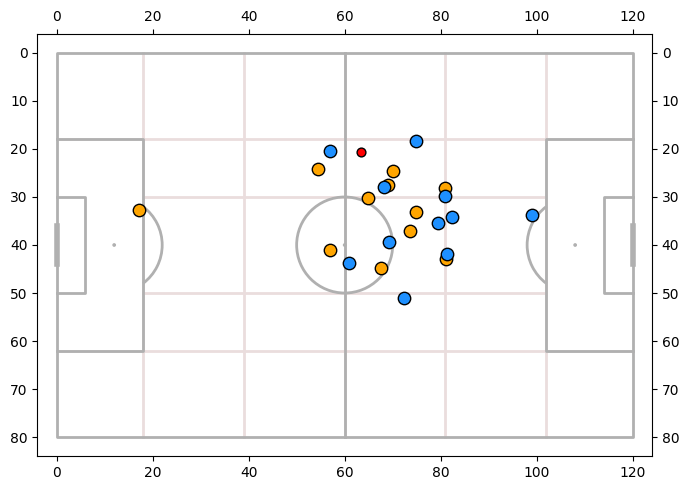

In [254]:
pitch = Pitch(axis=True, label=True, tick=True, positional=True)
# specifying figure size (width, height)

pitch_x_offset = 52.5
pitch_y_offset = 34
fig, ax = pitch.draw(figsize=(10, 5))

pitch.scatter(scene[(scene.TeamId == 'DFL-CLU-ZZZZ01')].X+pitch_x_offset, scene[(scene.TeamId == 'DFL-CLU-ZZZZ01')].Y+pitch_y_offset, c='orange', s=80, ec='k', ax=ax)
pitch.scatter(scene[(scene.TeamId == 'DFL-CLU-ZZZZ00')].X+pitch_x_offset, scene[(scene.TeamId == 'DFL-CLU-ZZZZ00')].Y+pitch_y_offset, c='dodgerblue', s=80, ec='k', ax=ax)
pitch.scatter(scene[(scene.TeamId == 'BALL')].X+pitch_x_offset, scene[(scene.TeamId == 'BALL')].Y+pitch_y_offset, c='red', s=40, ec='k', ax=ax)

filename = f'{i}.png'
filenames.append(filename)

# save frame
plt.savefig(filename)
plt.close()




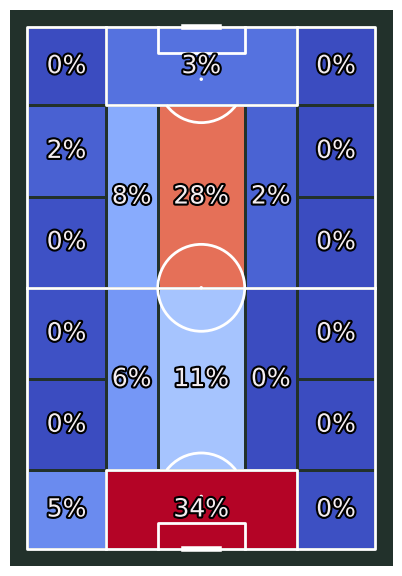